In [1]:
#workspace()
include("../src/UNSflow.jl")


Use "(eld::EldUpDef)(...)" instead.

Use "(eld::EldUptstartDef)(...)" instead.

Use "(cons::ConstDef)(...)" instead.

Use "(eld::EldRampReturnDef)(...)" instead.

Use "(kin::SinDef)(...)" instead.

Use "(kin::CosDef)(...)" instead.
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:294
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:294
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:486
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:486
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:606
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:674

Use "(eld::EldUpIntDef)(...)" instead.

Use "(eld::EldUpInttstartDef)(...)" instead.

Use "(kelv::KelvinCondition)(...)" instead.

Use "(kelv::KelvinCondition2DOF)(...)" instead.

Use "(kelv::KelvinCondition2DFree)(...)" instead.

Use "(kelv::KelvinConditionwFlap)(...)" instead.

Use "(kelv::KelvinKutta)(...)" instead.

Use "(kelv::Kelvin

UNSflow

In [2]:
using UNSflow

# Recreate Antonio 3D results using a strip theory approach and LDVM

In [33]:
c = 0.2
u = 10
f = 0.8889
k = 2*pi*f*c/(2*u)
c = 1
u = 1
w = 2*k
b = 6

T = (2*pi/w)
ncyc = 4
t_tot = ncyc*T 

224.99718753515583

In [34]:
#The bending mode which we wish to simulate
data = readdlm("../test/anto_mode1.dat");

In [35]:
using PyPlot

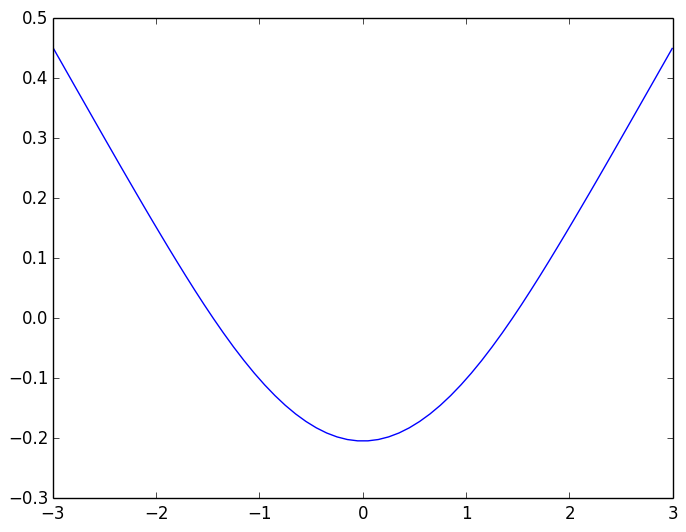

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x321a50990>

In [36]:
plot(data[:,3],data[:,4])

### Let's place strips at -3, -2, -1 and 0. Set up 2D problems at these positions. 



In [37]:
#Strip at y = -3

h_amp = 0.45/c #input is nondimensional
alpha_amp = 5*pi/180 #Root incidence



dtstar = 0.015*0.2*2/(k*h_amp) 
dt = dtstar*c/u

nsteps =round(Int,t_tot/dt)+1

alphadef = ConstDef(alpha_amp)
hdef = CosDef(0., h_amp, w, 0.)
udef = ConstDef(u)

full_kinem = KinemDef(alphadef, hdef, udef)

pvt = 0.0 #Doesnt matter, no pitch

lespcrit = [21;] #high value to turn off LEV shedding

surf = TwoDSurf(c, u, "FlatPlate", pvt, 70, 35, "Prescribed", full_kinem, lespcrit)

curfield = TwoDFlowField()

del = DelVortDef(1, 500, 10)


UNSflow.DelVortDef(1,500,10.0)

In [38]:
nsteps

943

In [39]:
mat, surf, curfield = ldvm(surf, curfield, nsteps, dtstar)

(
[0.238729 0.0872665 0.44984 1.0 0.0489659 0.948309 0.0678438 -0.401601 0.0908769; 0.477459 0.0872665 0.44936 1.0 0.0541242 0.400372 0.0165515 -0.131571 0.125297; 0.716188 0.0872665 0.448561 1.0 0.0584344 0.409981 0.0143323 -0.123161 0.148424; 0.954918 0.0872665 0.447442 1.0 0.0621695 0.424879 0.0127945 -0.121928 0.16627; 1.19365 0.0872665 0.446006 1.0 0.0654854 0.44056 0.0114966 -0.122956 0.180949; 1.43238 0.0872665 0.444252 1.0 0.0684823 0.455969 0.0103126 -0.124919 0.193508; 1.67111 0.0872665 0.442183 1.0 0.0712285 0.470798 0.00919 -0.127296 0.204547; 1.90984 0.0872665 0.439799 1.0 0.0737728 0.484977 0.00810359 -0.129853 0.214441; 2.14856 0.0872665 0.437102 1.0 0.0761512 0.498522 0.00703969 -0.132476 0.223447; 2.38729 0.0872665 0.434095 1.0 0.0783906 0.511478 0.00599025 -0.135106 0.231741; 2.62602 0.0872665 0.430778 1.0 0.0805123 0.523895 0.00495024 -0.137712 0.239456; 2.86475 0.0872665 0.427156 1.0 0.0825325 0.535823 0.00391634 -0.140277 0.246689; 3.10348 0.0872665 0.42323 1.0 0.0

In [70]:
range = round(Int,(ncyc-1)*nsteps/ncyc)+1:nsteps
tbyT = (mat[range,1]-mat[range[1]])/T


107-element Array{Float64,1}:
 0.0       
 0.00936206
 0.0187241 
 0.0280862 
 0.0374482 
 0.0468103 
 0.0561723 
 0.0655344 
 0.0748964 
 0.0842585 
 0.0936206 
 0.102983  
 0.112345  
 0.121707  
 0.131069  
 0.140431  
 0.149793  
 0.159155  
 0.168517  
 0.177879  
 0.187241  
 0.196603  
 0.205965  
 0.215327  
 0.224689  
 0.234051  
 0.243413  
 0.252775  
 0.262138  
 0.2715    
 0.280862  
 0.290224  
 0.299586  
 0.308948  
 0.31831   
 0.327672  
 0.337034  
 0.346396  
 0.355758  
 0.36512   
 0.374482  
 0.383844  
 0.393206  
 0.402568  
 0.41193   
 0.421292  
 0.430655  
 0.440017  
 0.449379  
 0.458741  
 0.468103  
 0.477465  
 0.486827  
 0.496189  
 0.505551  
 0.514913  
 0.524275  
 0.533637  
 0.542999  
 0.552361  
 0.561723  
 0.571085  
 0.580447  
 0.589809  
 0.599172  
 0.608534  
 0.617896  
 0.627258  
 0.63662   
 0.645982  
 0.655344  
 0.664706  
 0.674068  
 0.68343   
 0.692792  
 0.702154  
 0.711516  
 0.720878  
 0.73024   
 0.739602  
 0.748964 

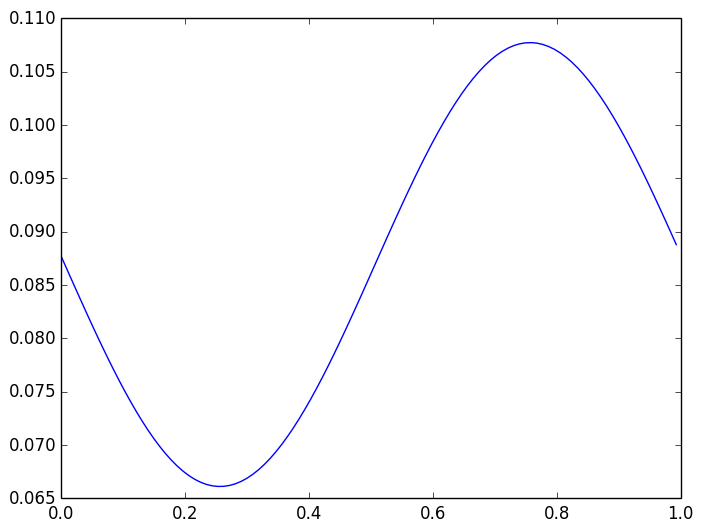

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x323a3d910>

In [71]:
plot(tbyT,mat[range,5])


In [42]:
##Store these values so we can get back to it later

mat1, surf1, curfield1 = mat, surf, curfield


(
[0.238729 0.0872665 0.44984 1.0 0.0489659 0.948309 0.0678438 -0.401601 0.0908769; 0.477459 0.0872665 0.44936 1.0 0.0541242 0.400372 0.0165515 -0.131571 0.125297; 0.716188 0.0872665 0.448561 1.0 0.0584344 0.409981 0.0143323 -0.123161 0.148424; 0.954918 0.0872665 0.447442 1.0 0.0621695 0.424879 0.0127945 -0.121928 0.16627; 1.19365 0.0872665 0.446006 1.0 0.0654854 0.44056 0.0114966 -0.122956 0.180949; 1.43238 0.0872665 0.444252 1.0 0.0684823 0.455969 0.0103126 -0.124919 0.193508; 1.67111 0.0872665 0.442183 1.0 0.0712285 0.470798 0.00919 -0.127296 0.204547; 1.90984 0.0872665 0.439799 1.0 0.0737728 0.484977 0.00810359 -0.129853 0.214441; 2.14856 0.0872665 0.437102 1.0 0.0761512 0.498522 0.00703969 -0.132476 0.223447; 2.38729 0.0872665 0.434095 1.0 0.0783906 0.511478 0.00599025 -0.135106 0.231741; 2.62602 0.0872665 0.430778 1.0 0.0805123 0.523895 0.00495024 -0.137712 0.239456; 2.86475 0.0872665 0.427156 1.0 0.0825325 0.535823 0.00391634 -0.140277 0.246689; 3.10348 0.0872665 0.42323 1.0 0.0

In [43]:
# Second strip 

#Strip at y = -2

h_amp = (0.1638 + 0.1407)/(2*c) #m #Roughly calculated from file
alpha_amp = 5*pi/180 # built incidence


dtstar = 0.015*0.2*2/(k*h_amp) 
dt = dtstar*c/u

nsteps =round(Int,t_tot/dt)+1

alphadef = ConstDef(alpha_amp)
hdef = CosDef(0., h_amp, w, 0.)
udef = ConstDef(u)

full_kinem = KinemDef(alphadef, hdef, udef)

pvt = 0.0 #Doesnt matter, no pitch

lespcrit = [21;] #high value to turn off LEV shedding

surf = TwoDSurf(c, u, "FlatPlate", pvt, 70, 35, "Prescribed", full_kinem, lespcrit)

curfield = TwoDFlowField()

del = DelVortDef(1, 500, 10)





UNSflow.DelVortDef(1,500,10.0)

In [44]:
mat, surf, curfield = ldvm(surf, curfield, nsteps, dtstar)

(
[0.705604 0.0872665 0.151777 1.0 0.0557921 0.615747 0.0342381 -0.235129 0.142094; 1.41121 0.0872665 0.150362 1.0 0.0646141 0.445611 0.0126535 -0.129225 0.185046; 2.11681 0.0872665 0.148014 1.0 0.0705481 0.466237 0.00939938 -0.126334 0.20985; 2.82242 0.0872665 0.144746 1.0 0.0749726 0.487133 0.00716658 -0.128312 0.227; 3.52802 0.0872665 0.14058 1.0 0.0784911 0.505598 0.00537646 -0.131218 0.240009; 4.23363 0.0872665 0.13554 1.0 0.0814127 0.521745 0.00384257 -0.134213 0.250466; 4.93923 0.0872665 0.129659 1.0 0.0839124 0.535967 0.00248032 -0.137065 0.259208; 5.64483 0.0872665 0.122974 1.0 0.0860956 0.548602 0.00124476 -0.139711 0.266717; 6.35044 0.0872665 0.115524 1.0 0.0880291 0.559905 0.000110144 -0.142139 0.273286; 7.05604 0.0872665 0.107357 1.0 0.0897564 0.570055 -0.000938646 -0.144349 0.279104; 7.76165 0.0872665 0.0985241 1.0 0.0913064 0.579181 -0.00191031 -0.14635 0.284295; 8.46725 0.0872665 0.089079 1.0 0.0926986 0.587372 -0.00280948 -0.148148 0.28894; 9.17285 0.0872665 0.0790809 

In [45]:
range = round(Int,(ncyc-1)*nsteps/ncyc)+1:nsteps
tbyT = (mat[range,1]-mat[range[1]])/T

80-element Array{Float64,1}:
 0.0      
 0.0125442
 0.0250885
 0.0376327
 0.0501769
 0.0627212
 0.0752654
 0.0878096
 0.100354 
 0.112898 
 0.125442 
 0.137987 
 0.150531 
 0.163075 
 0.175619 
 0.188163 
 0.200708 
 0.213252 
 0.225796 
 0.23834  
 0.250885 
 0.263429 
 0.275973 
 0.288517 
 0.301062 
 0.313606 
 0.32615  
 0.338694 
 0.351238 
 0.363783 
 0.376327 
 0.388871 
 0.401415 
 0.41396  
 0.426504 
 0.439048 
 0.451592 
 0.464137 
 0.476681 
 0.489225 
 0.501769 
 0.514314 
 0.526858 
 0.539402 
 0.551946 
 0.56449  
 0.577035 
 0.589579 
 0.602123 
 0.614667 
 0.627212 
 0.639756 
 0.6523   
 0.664844 
 0.677389 
 0.689933 
 0.702477 
 0.715021 
 0.727565 
 0.74011  
 0.752654 
 0.765198 
 0.777742 
 0.790287 
 0.802831 
 0.815375 
 0.827919 
 0.840464 
 0.853008 
 0.865552 
 0.878096 
 0.89064  
 0.903185 
 0.915729 
 0.928273 
 0.940817 
 0.953362 
 0.965906 
 0.97845  
 0.990994 

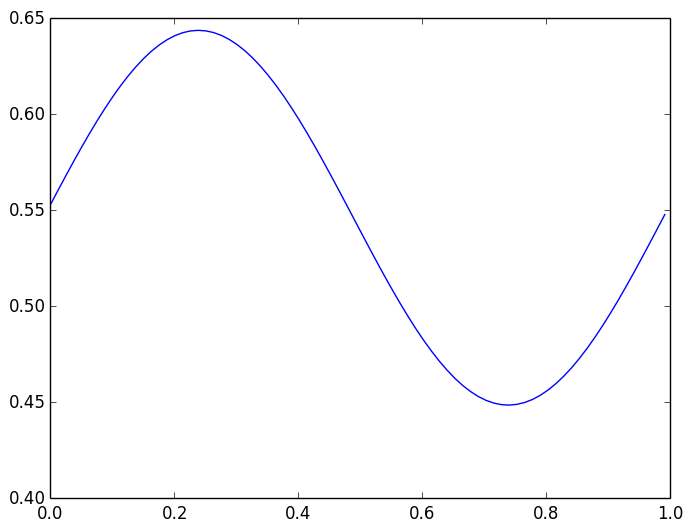

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x320f7d550>

In [46]:
plot(tbyT,mat[range,6])

In [47]:
##Store these values so we can get back to it later

mat2, surf2, curfield2 = mat, surf, curfield

(
[0.705604 0.0872665 0.151777 1.0 0.0557921 0.615747 0.0342381 -0.235129 0.142094; 1.41121 0.0872665 0.150362 1.0 0.0646141 0.445611 0.0126535 -0.129225 0.185046; 2.11681 0.0872665 0.148014 1.0 0.0705481 0.466237 0.00939938 -0.126334 0.20985; 2.82242 0.0872665 0.144746 1.0 0.0749726 0.487133 0.00716658 -0.128312 0.227; 3.52802 0.0872665 0.14058 1.0 0.0784911 0.505598 0.00537646 -0.131218 0.240009; 4.23363 0.0872665 0.13554 1.0 0.0814127 0.521745 0.00384257 -0.134213 0.250466; 4.93923 0.0872665 0.129659 1.0 0.0839124 0.535967 0.00248032 -0.137065 0.259208; 5.64483 0.0872665 0.122974 1.0 0.0860956 0.548602 0.00124476 -0.139711 0.266717; 6.35044 0.0872665 0.115524 1.0 0.0880291 0.559905 0.000110144 -0.142139 0.273286; 7.05604 0.0872665 0.107357 1.0 0.0897564 0.570055 -0.000938646 -0.144349 0.279104; 7.76165 0.0872665 0.0985241 1.0 0.0913064 0.579181 -0.00191031 -0.14635 0.284295; 8.46725 0.0872665 0.089079 1.0 0.0926986 0.587372 -0.00280948 -0.148148 0.28894; 9.17285 0.0872665 0.0790809 

In [48]:
# Third strip 

#Strip at y = -1

h_amp = (-0.0912 - 0.1107)/(2*c) #m #Roughly calculated from file
alpha_amp = 5*pi/180 #Since we are using the airfoil file, no need to consider built incidence?

dtstar = 0.015*0.2*2/(k*abs(h_amp)) 
dt = dtstar*c/u

nsteps =round(Int,t_tot/dt)+1

alphadef = ConstDef(alpha_amp)
hdef = CosDef(0., h_amp, w, 0.)
udef = ConstDef(u)

full_kinem = KinemDef(alphadef, hdef, udef)

pvt = 0.0 #Doesnt matter, no pitch

lespcrit = [21;] #high value to turn off LEV shedding

surf = TwoDSurf(c, u, "FlatPlate", pvt, 70, 35, "Prescribed", full_kinem, lespcrit)

curfield = TwoDFlowField()

del = DelVortDef(1, 500, 10)

UNSflow.DelVortDef(1,500,10.0)

In [49]:
mat, surf, curfield = ldvm(surf, curfield, nsteps, dtstar)

(
[1.06417 0.0872665 -0.100238 1.0 0.0578277 0.554363 0.0274089 -0.199984 0.159027; 2.12835 0.0872665 -0.0981105 1.0 0.0655721 0.435973 0.0110237 -0.119763 0.196019; 3.19252 0.0872665 -0.0945987 1.0 0.0693521 0.445055 0.00860144 -0.115441 0.212419; 4.25669 0.0872665 -0.0897518 1.0 0.0713379 0.45211 0.00745657 -0.114796 0.220836; 5.32086 0.0872665 -0.0836381 1.0 0.0723801 0.456141 0.00686462 -0.114671 0.225318; 6.38504 0.0872665 -0.0763441 1.0 0.0728892 0.458061 0.00656618 -0.11456 0.227643; 7.44921 0.0872665 -0.0679725 1.0 0.0730917 0.458685 0.00643427 -0.1144 0.228735; 8.51338 0.0872665 -0.0586416 1.0 0.0731251 0.458608 0.00639669 -0.114221 0.229132; 9.57756 0.0872665 -0.048483 1.0 0.0730786 0.458254 0.00640866 -0.114071 0.229172; 10.6417 0.0872665 -0.0376402 1.0 0.0730133 0.457934 0.00644077 -0.113993 0.22908; 11.7059 0.0872665 -0.0262661 1.0 0.0729725 0.457872 0.0064729 -0.114023 0.229014; 12.7701 0.0872665 -0.0145213 1.0 0.0729876 0.458235 0.00649082 -0.114191 0.229087; 13.8342 0.0

In [50]:
range = round(Int,(ncyc-1)*nsteps/ncyc)+1:nsteps
tbyT = (mat[range,1]-mat[range[1]])/T

53-element Array{Float64,1}:
 0.0      
 0.0189189
 0.0378377
 0.0567566
 0.0756755
 0.0945943
 0.113513 
 0.132432 
 0.151351 
 0.17027  
 0.189189 
 0.208108 
 0.227026 
 0.245945 
 0.264864 
 0.283783 
 0.302702 
 0.321621 
 0.34054  
 0.359458 
 0.378377 
 0.397296 
 0.416215 
 0.435134 
 0.454053 
 0.472972 
 0.49189  
 0.510809 
 0.529728 
 0.548647 
 0.567566 
 0.586485 
 0.605404 
 0.624323 
 0.643241 
 0.66216  
 0.681079 
 0.699998 
 0.718917 
 0.737836 
 0.756755 
 0.775673 
 0.794592 
 0.813511 
 0.83243  
 0.851349 
 0.870268 
 0.889187 
 0.908105 
 0.927024 
 0.945943 
 0.964862 
 0.983781 

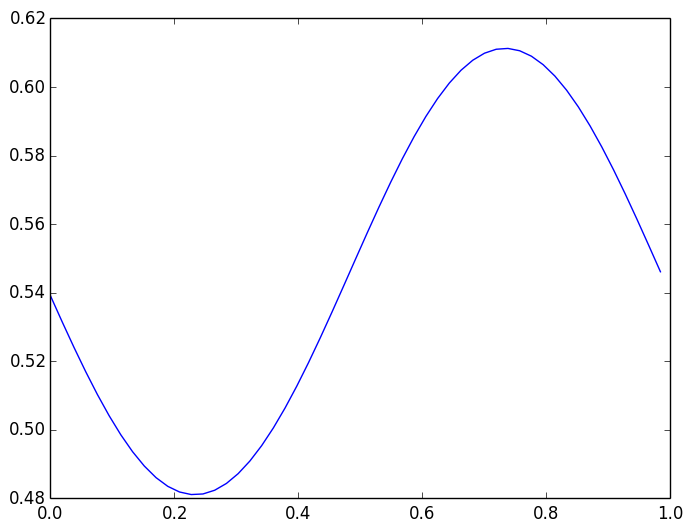

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3215266d0>

In [51]:
plot(tbyT,mat[range,6])

In [52]:
##Store these values so we can get back to it later

mat3, surf3, curfield3 = mat, surf, curfield

(
[1.06417 0.0872665 -0.100238 1.0 0.0578277 0.554363 0.0274089 -0.199984 0.159027; 2.12835 0.0872665 -0.0981105 1.0 0.0655721 0.435973 0.0110237 -0.119763 0.196019; 3.19252 0.0872665 -0.0945987 1.0 0.0693521 0.445055 0.00860144 -0.115441 0.212419; 4.25669 0.0872665 -0.0897518 1.0 0.0713379 0.45211 0.00745657 -0.114796 0.220836; 5.32086 0.0872665 -0.0836381 1.0 0.0723801 0.456141 0.00686462 -0.114671 0.225318; 6.38504 0.0872665 -0.0763441 1.0 0.0728892 0.458061 0.00656618 -0.11456 0.227643; 7.44921 0.0872665 -0.0679725 1.0 0.0730917 0.458685 0.00643427 -0.1144 0.228735; 8.51338 0.0872665 -0.0586416 1.0 0.0731251 0.458608 0.00639669 -0.114221 0.229132; 9.57756 0.0872665 -0.048483 1.0 0.0730786 0.458254 0.00640866 -0.114071 0.229172; 10.6417 0.0872665 -0.0376402 1.0 0.0730133 0.457934 0.00644077 -0.113993 0.22908; 11.7059 0.0872665 -0.0262661 1.0 0.0729725 0.457872 0.0064729 -0.114023 0.229014; 12.7701 0.0872665 -0.0145213 1.0 0.0729876 0.458235 0.00649082 -0.114191 0.229087; 13.8342 0.0

In [53]:
# Second strip 

#Strip at y = 0

h_amp = -0.2040/c #m #Roughly calculated from file
alpha_amp = 5*pi/180 #Since we are using the airfoil file, no need to consider built incidence?


dtstar = 0.015*0.2*2/(k*abs(h_amp)) 
dt = dtstar*c/u

nsteps =round(Int,t_tot/dt)+1

alphadef = ConstDef(alpha_amp)
hdef = CosDef(0., h_amp, w, 0.)
udef = ConstDef(u)

full_kinem = KinemDef(alphadef, hdef, udef)

pvt = 0.0 #Doesnt matter, no pitch

lespcrit = [21;] #high value to turn off LEV shedding

surf = TwoDSurf(c, u, "FlatPlate", pvt, 70, 35, "Prescribed", full_kinem, lespcrit)

curfield = TwoDFlowField()

del = DelVortDef(1, 500, 10)






UNSflow.DelVortDef(1,500,10.0)

In [54]:
mat, surf, curfield = ldvm(surf, curfield, nsteps, dtstar)

(
[0.526609 0.0872665 -0.203647 1.0 0.0518599 0.647238 0.0396631 -0.256027 0.123202; 1.05322 0.0872665 -0.20259 1.0 0.0579256 0.398546 0.0137052 -0.117601 0.159759; 1.57983 0.0872665 -0.200832 1.0 0.0616553 0.403826 0.0113542 -0.109655 0.179338; 2.10644 0.0872665 -0.198379 1.0 0.0640484 0.410843 0.0100708 -0.107474 0.191322; 2.63305 0.0872665 -0.19524 1.0 0.0655933 0.416179 0.00927433 -0.10668 0.199014; 3.15965 0.0872665 -0.191425 1.0 0.0665651 0.419632 0.00876645 -0.106249 0.203999; 3.68626 0.0872665 -0.186949 1.0 0.0671334 0.42149 0.00844982 -0.105871 0.207159; 4.21287 0.0872665 -0.181826 1.0 0.0674103 0.422086 0.00826693 -0.105448 0.209039; 4.73948 0.0872665 -0.176073 1.0 0.0674735 0.421707 0.00818003 -0.104957 0.209996; 5.26609 0.0872665 -0.169712 1.0 0.0673793 0.420593 0.00816268 -0.104402 0.210279; 5.7927 0.0872665 -0.162764 1.0 0.0671696 0.418935 0.00819561 -0.103796 0.210067; 6.31931 0.0872665 -0.155252 1.0 0.0668766 0.41689 0.0082644 -0.103157 0.209492; 6.84592 0.0872665 -0.14

In [55]:
range = round(Int,(ncyc-1)*nsteps/ncyc)+1:nsteps
tbyT = (mat[range,1]-mat[range[1]])/T

107-element Array{Float64,1}:
 0.0       
 0.00936206
 0.0187241 
 0.0280862 
 0.0374482 
 0.0468103 
 0.0561723 
 0.0655344 
 0.0748964 
 0.0842585 
 0.0936206 
 0.102983  
 0.112345  
 0.121707  
 0.131069  
 0.140431  
 0.149793  
 0.159155  
 0.168517  
 0.177879  
 0.187241  
 0.196603  
 0.205965  
 0.215327  
 0.224689  
 0.234051  
 0.243413  
 0.252775  
 0.262138  
 0.2715    
 0.280862  
 0.290224  
 0.299586  
 0.308948  
 0.31831   
 0.327672  
 0.337034  
 0.346396  
 0.355758  
 0.36512   
 0.374482  
 0.383844  
 0.393206  
 0.402568  
 0.41193   
 0.421292  
 0.430655  
 0.440017  
 0.449379  
 0.458741  
 0.468103  
 0.477465  
 0.486827  
 0.496189  
 0.505551  
 0.514913  
 0.524275  
 0.533637  
 0.542999  
 0.552361  
 0.561723  
 0.571085  
 0.580447  
 0.589809  
 0.599172  
 0.608534  
 0.617896  
 0.627258  
 0.63662   
 0.645982  
 0.655344  
 0.664706  
 0.674068  
 0.68343   
 0.692792  
 0.702154  
 0.711516  
 0.720878  
 0.73024   
 0.739602  
 0.748964 

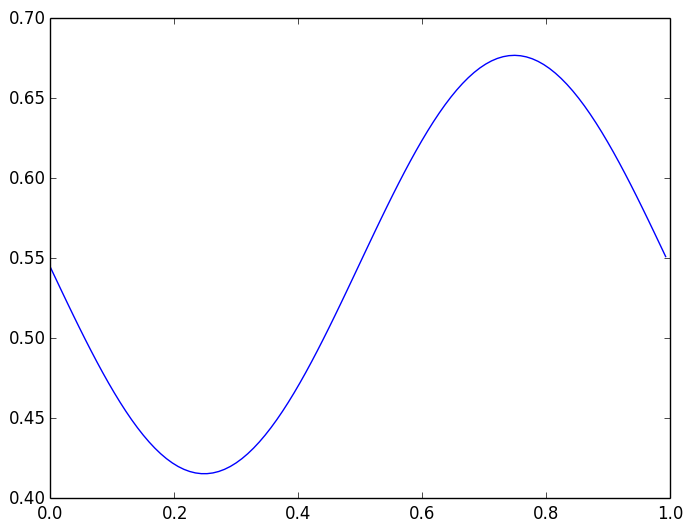

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3215d3d50>

In [56]:
plot(tbyT,mat[range,6])

In [57]:
##Store these values so we can get back to it later

mat4, surf4, curfield4 = mat, surf, curfield

(
[0.526609 0.0872665 -0.203647 1.0 0.0518599 0.647238 0.0396631 -0.256027 0.123202; 1.05322 0.0872665 -0.20259 1.0 0.0579256 0.398546 0.0137052 -0.117601 0.159759; 1.57983 0.0872665 -0.200832 1.0 0.0616553 0.403826 0.0113542 -0.109655 0.179338; 2.10644 0.0872665 -0.198379 1.0 0.0640484 0.410843 0.0100708 -0.107474 0.191322; 2.63305 0.0872665 -0.19524 1.0 0.0655933 0.416179 0.00927433 -0.10668 0.199014; 3.15965 0.0872665 -0.191425 1.0 0.0665651 0.419632 0.00876645 -0.106249 0.203999; 3.68626 0.0872665 -0.186949 1.0 0.0671334 0.42149 0.00844982 -0.105871 0.207159; 4.21287 0.0872665 -0.181826 1.0 0.0674103 0.422086 0.00826693 -0.105448 0.209039; 4.73948 0.0872665 -0.176073 1.0 0.0674735 0.421707 0.00818003 -0.104957 0.209996; 5.26609 0.0872665 -0.169712 1.0 0.0673793 0.420593 0.00816268 -0.104402 0.210279; 5.7927 0.0872665 -0.162764 1.0 0.0671696 0.418935 0.00819561 -0.103796 0.210067; 6.31931 0.0872665 -0.155252 1.0 0.0668766 0.41689 0.0082644 -0.103157 0.209492; 6.84592 0.0872665 -0.14

## Let's try and gather the results

In [66]:
#Using nondimensional quantities here
time = [0:0.001:t_tot;]
cl1_spl = Spline1D(mat1[:,1],mat1[:,6])
cl2_spl = Spline1D(mat2[:,1],mat2[:,6])
cl3_spl = Spline1D(mat3[:,1],mat3[:,6])
cl4_spl = Spline1D(mat4[:,1],mat4[:,6])

cm1_spl = Spline1D(mat1[:,1],mat1[:,8])
cm2_spl = Spline1D(mat2[:,1],mat2[:,8])
cm3_spl = Spline1D(mat3[:,1],mat3[:,8])
cm4_spl = Spline1D(mat4[:,1],mat4[:,8])

cd1_spl = Spline1D(mat1[:,1],mat1[:,7])
cd2_spl = Spline1D(mat2[:,1],mat2[:,7])
cd3_spl = Spline1D(mat3[:,1],mat3[:,7])
cd4_spl = Spline1D(mat4[:,1],mat4[:,7])

cl1 = evaluate(cl1_spl,time)
cl2 = evaluate(cl2_spl,time)
cl3 = evaluate(cl3_spl,time)
cl4 = evaluate(cl4_spl,time)

cm1 = evaluate(cm1_spl,time)
cm2 = evaluate(cm2_spl,time)
cm3 = evaluate(cm3_spl,time)
cm4 = evaluate(cm4_spl,time)

cd1 = evaluate(cd1_spl,time)
cd2 = evaluate(cd2_spl,time)
cd3 = evaluate(cd3_spl,time)
cd4 = evaluate(cd4_spl,time)

range = round(Int,(ncyc-1)*length(time)/ncyc)+1:length(time)
tbyT = (time[range]-time[range[1]])/(T)



56250-element Array{Float64,1}:
 0.0        
 1.7778e-5  
 3.5556e-5  
 5.3334e-5  
 7.1112e-5  
 8.889e-5   
 0.000106668
 0.000124446
 0.000142224
 0.000160002
 0.00017778 
 0.000195558
 0.000213336
 0.000231114
 0.000248892
 0.00026667 
 0.000284448
 0.000302226
 0.000320004
 0.000337782
 0.00035556 
 0.000373338
 0.000391116
 0.000408894
 0.000426672
 0.00044445 
 0.000462228
 0.000480006
 0.000497784
 0.000515562
 0.00053334 
 0.000551118
 0.000568896
 0.000586674
 0.000604452
 0.00062223 
 0.000640008
 0.000657786
 0.000675564
 0.000693342
 0.00071112 
 0.000728898
 0.000746676
 0.000764454
 0.000782232
 0.00080001 
 0.000817788
 0.000835566
 0.000853344
 0.000871122
 0.0008889  
 0.000906678
 0.000924456
 0.000942234
 0.000960012
 0.00097779 
 0.000995568
 0.00101335 
 0.00103112 
 0.0010489  
 0.00106668 
 0.00108446 
 0.00110224 
 0.00112001 
 0.00113779 
 0.00115557 
 0.00117335 
 0.00119113 
 0.0012089  
 0.00122668 
 0.00124446 
 0.00126224 
 0.00128002 
 0.00129779 
 0.001

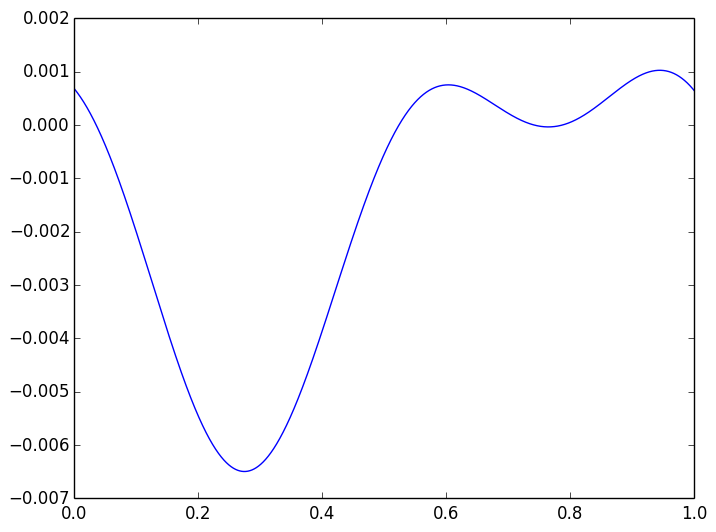

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3203c47d0>

In [67]:
#Now consider that there are 6 strips
# at strip 1 and 6 , cl = 0.5*(cl1+cl2)
dy = 1
cl_tot = (cl1 + cl2 + cl2 + cl3 + cl3 + cl4)*dy*c/b

#plot(tbyT,cl1[range])
#plot(tbyT,cl2[range])
#plot(tbyT,cl3[range])
#plot(tbyT,cl4[range])
#plot(tbyT,cl_tot[range])


#cm_tot = (cm1 + cm2 + cm2 + cm3 + cm3 + cm4)*dy*c/b
#plot(tbyT,cm_tot[range])

cd_tot = (cd1 + cd2 + cd2 + cd3 + cd3 + cd4)*dy*c/b
plot(tbyT,cd_tot[range])





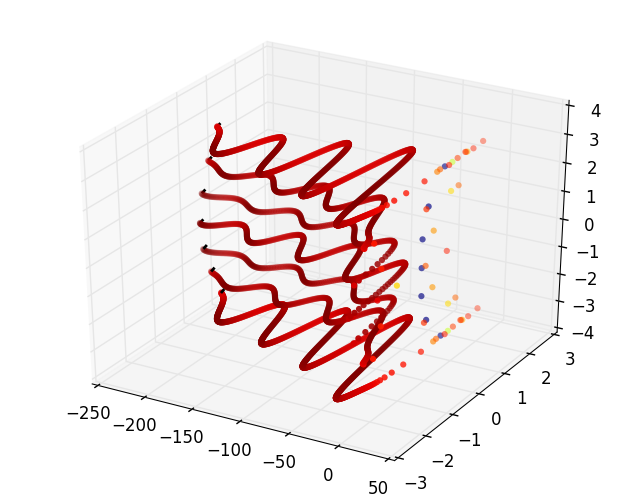

PyObject <mpl_toolkits.mplot3d.art3d.Patch3DCollection object at 0x320409410>

In [60]:
### Visualise the 3D problem
fig = figure()
ax = gca(projection="3d")

plot3D(map(q->q.x, surf1.bv),map(q->q.z,surf1.bv),-3,"y",color = "black",linewidth=2.0)
plot3D(map(q->q.x, surf2.bv),map(q->q.z,surf2.bv),-2,"y",color = "black",linewidth=2.0)
plot3D(map(q->q.x, surf3.bv),map(q->q.z,surf3.bv),-1,"y",color = "black",linewidth=2.0)
plot3D(map(q->q.x, surf4.bv),map(q->q.z,surf4.bv),0, "y",color = "black",linewidth=2.0)
plot3D(map(q->q.x, surf1.bv),map(q->q.z,surf1.bv),3, "y",color = "black",linewidth=2.0)
plot3D(map(q->q.x, surf2.bv),map(q->q.z,surf2.bv),2, "y",color = "black",linewidth=2.0)
plot3D(map(q->q.x, surf3.bv),map(q->q.z,surf3.bv),1, "y",color = "black",linewidth=2.0)


scatter3D(map(q->q.x, curfield1.tev),map(q->q.z,curfield1.tev),-3,"z",s=20,c=map(q->q.s,curfield1.tev),cmap=ColorMap("jet"),edgecolors="none")
scatter3D(map(q->q.x, curfield2.tev),map(q->q.z,curfield2.tev),-2,"z",s=20,c=map(q->q.s,curfield2.tev),cmap=ColorMap("jet"),edgecolors="none")
scatter3D(map(q->q.x, curfield3.tev),map(q->q.z,curfield3.tev),-1,"z",s=20,c=map(q->q.s,curfield3.tev),cmap=ColorMap("jet"),edgecolors="none")
scatter3D(map(q->q.x, curfield4.tev),map(q->q.z,curfield4.tev),0,"z",s=20,c=map(q->q.s,curfield4.tev),cmap=ColorMap("jet"),edgecolors="none")
scatter3D(map(q->q.x, curfield1.tev),map(q->q.z,curfield1.tev),3,"z",s=20,c=map(q->q.s,curfield1.tev),cmap=ColorMap("jet"),edgecolors="none")
scatter3D(map(q->q.x, curfield2.tev),map(q->q.z,curfield2.tev),2,"z",s=20,c=map(q->q.s,curfield2.tev),cmap=ColorMap("jet"),edgecolors="none")
scatter3D(map(q->q.x, curfield3.tev),map(q->q.z,curfield3.tev),1,"z",s=20,c=map(q->q.s,curfield3.tev),cmap=ColorMap("jet"),edgecolors="none")






#axis("equal")
#ax[:view_init](20, 120)




# Now we atttempt the same problem with a basic LLT correction - circulation goes to zero at the wingtips 


In [17]:
#Construct dimensionless quantities from given values
c_d = 0.2
b_d = 6
AR = b_d/c_d

u_d = 10
f_d = 0.8889
k = 2*pi*f_d*c_d/(2*u_d)

#_dAll values below are nondimensional
c = 1
u = 1
w = 2*k
T = (2*pi/w)
ncyc = 2
t_tot = ncyc*T 

modedata = readdlm("../test/anto_mode1.dat");
mode_spl = Spline1D(modedata[:,3],modedata[:,4])

n_span = 5
n_bterm = 40

psi = zeros(n_span)

for i = 1:n_span
    psi[i] = (real(i)/(n_span+1))*pi/2
end

#Run LDVM at all these locations:
alpha_amp = 5*pi/180

h_amp = zeros(n_span)
for i = 1:n_span   
    y_d = -b_d*cos(psi[i])/2.
    h_amp[i] = evaluate(mode_spl,y_d)/c_d
end

dtstar = 0.015*0.2*2/(k*maximum(h_amp))
nsteps =round(Int,t_tot/dtstar)+1

alphadef = ConstDef(alpha_amp)
udef = ConstDef(u)
pvt = 0.0 #Doesnt matter, no pitch
lespcrit = [21;] #high value to turn off LEV shedding


W_mat = Array{Float64,2}[]
W_surf = TwoDSurf[]
W_curfield = TwoDFlowField[]

for i = 1:n_span
    hdef = CosDef(0., h_amp[i], w, 0.)
    full_kinem = KinemDef(alphadef, hdef, udef)
    surf = TwoDSurf(c, u, "FlatPlate", pvt, 70, 35, "Prescribed", full_kinem, lespcrit)
    curfield = TwoDFlowField()
    del = DelVortDef(1, 500, 10)

    mt, st, ct = ldvm(surf, curfield, nsteps, dtstar)
    push!(W_mat, mt)
    push!(W_surf, st)
    push!(W_curfield, ct)
end



In [18]:
lhs = zeros(2*n_span,n_bterm)
rhs = zeros(2*n_span)
b_coeff = zeros(nsteps,n_bterm)
sp_gam = zeros(nsteps,2*n_span)

dt = W_mat[1][2,1] - W_mat[1][1,1]

cnc_f = zeros(nsteps)
cnnc_f = zeros(nsteps)



2204-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [25]:
bdot = zeros(nsteps,n_bterm)

for i = 1:nsteps
    for j = 1:n_span
        for n = 1:n_bterm
            lhs[j,n] = sin(n*psi[j])*(sin(psi[j]) + (n*pi/(2*AR)))
        end
        rhs[j] = pi*sin(psi[j])*W_mat[j][i,9]/(2*AR)
    end
    lhs[n_span+1:end,:] = flipdim(lhs[1:n_span,:],1)
    rhs[n_span+1:end] = flipdim(rhs[1:n_span],1)

    
    b_coeff[i,:] = \(lhs, rhs)
    if i >= 2   
        bdot[i,:] = (b_coeff[i,:] - b_coeff[i-1,:])/dt
    end
       
end


    
        


In [29]:
a03d = zeros(nsteps,n_span)
a0dot3d = zeros(nsteps,n_span)
gam_other = zeros(nsteps,n_span)

for i = 1:nsteps
    for j = 1:n_span
         sp_gam[i,j] = 0
         for n = 1:n_bterm
             sp_gam[i,j] = sp_gam[i,j] + 2*b_d*u*b_coeff[i,n]*sin(n*psi[j])
         end
    end  
end

for i = 1:nsteps
    for j = 1:n_span
        a03d[i,j] = 0
        for n = 1:n_bterm
            a03d[i,j] = a03d[i,j] - real(n)*b_coeff[i,n]*sin(n*psi[j])/sin(psi[j])
            a0dot3d[i,j] = a0dot3d[i,j] - real(n)*bdot[i,n]*sin(n*psi[j])/sin(psi[j])
        end
        gam_other[i,j] = u*c_d*pi*(W_mat[j][i,9] + a03d[i,j])
    end
end



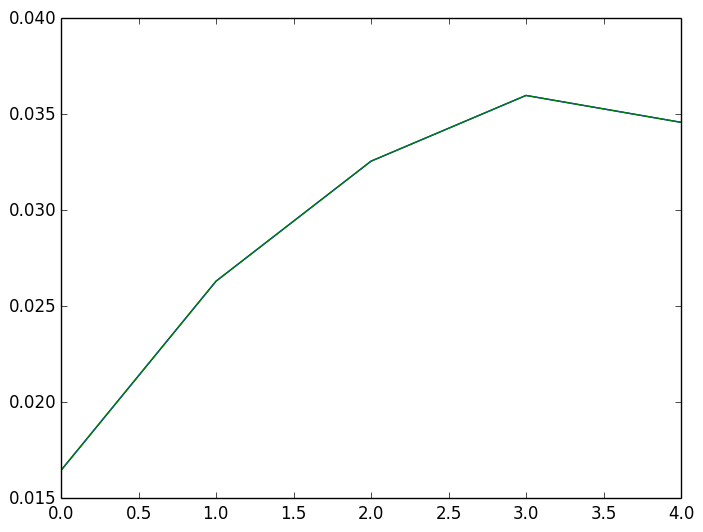

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x316b39550>

In [32]:
plot(sp_gam[10,1:n_span])
plot(gam_other[10,:])

In [36]:
alpha = zeros(nsteps,n_span)
h = zeros(nsteps,n_span)
hdot = zeros(nsteps,n_span)


2204×5 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0


In [ ]:
sum_bcoeff = 0
    for n = 1:n_bterm
        if rem(n,2) != 0
            sum_bcoeff = sum_bcoeff + b_coeff[n]
        end
    end

    cnc_f[i] = -2*pi*(u[i]*cos(alpha[i])/surf.uref + hdot[i]*sin(alpha[i])/surf.uref)*(sum_bcoeff)
    sum_bdot = 0
        for n = 1:n_bterm
            if rem(n,2) != 0
                sum_bdot = sum_bdot + bdot[n]
            end
        end
        cnnc_f[i] = -(2*pi*surf.c/(surf.uref))*(3*sum_bdot/4)
    end